In [7]:
import numpy
import cv2
import matplotlib.pyplot as plt
import os
import matplotlib.image as im

In [4]:
folder = r"E:\MLIoT\ML\dataset\emotion_detection\images"
filenames = os.listdir(folder)
len(filenames)

42

1. load images one by one in a for loop
2. identify face area
3. crop the face area for 0th face as there is only 1 face in every image
4. resize that to 100x100
5. convert it to flat array => convert 100x100 to 1x10000
6. append face array to xd
7. append the corresponding emotion label to yd

In [42]:
# collect data - features and labels
xd = []
yd = []
fd = cv2.CascadeClassifier("C:/Python36/images/haarcascade_frontalface_alt.xml")
for img_name in filenames:
    img = im.imread(folder+'\\'+img_name,'PNG') # read the image
    faces = fd.detectMultiScale(img,1.3,5) # get the face coordinates
    (x,y,w,h) = faces[0] # extract 0th face coordinate
    face = img[y:y+h,x:x+w] # crop the face image
    face = cv2.resize(face,(100,100)) # resizing image to 148x148
    face = face.reshape(1,-1) #flattening the image to 1x10000
    xd.append(face) #append face into xd
    yd.append(img_name[10:-4])

In [43]:
xd = numpy.concatenate(xd)
xd.shape

(42, 10000)

In [71]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,50,20),
                     max_iter=5000,tol = 1e-8)
model.fit(xd,yd)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=1e-08,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [72]:
model.score(xd,yd)

0.9523809523809523

In [89]:
def predict(img,model=model):
    faces = fd.detectMultiScale(img,1.3,5) # get the face coordinates
    (x,y,w,h) = faces[-1] # extract 0th face coordinate
    face = img[y:y+h,x:x+w] # crop the face image
    face = cv2.resize(face,(100,100)) # resizing image to 100x100
    face = face.reshape(1,-1)
    output =  model.predict(face)
    print(output)
    plt.imshow(img,cmap='gray')
    plt.show()

['happy']


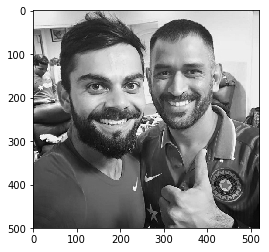

In [90]:
img2 = cv2.imread("C:\Python36\images\dhonikohli3.jpg",0)
predict(img2)